In [1]:
import os
import random
import numpy as np
import pandas as pd 
from skimage import io
from skimage import color
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from dask.array.image import imread
from dask import bag, threaded
from dask.diagnostics import ProgressBar
import cv2
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")



import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image 
from keras.layers.normalization import BatchNormalization
from keras import optimizers

Using TensorFlow backend.


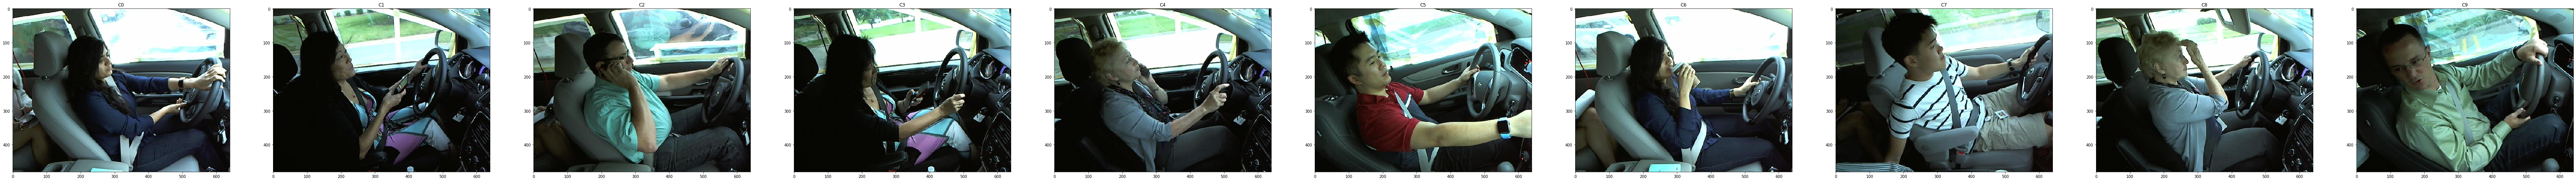

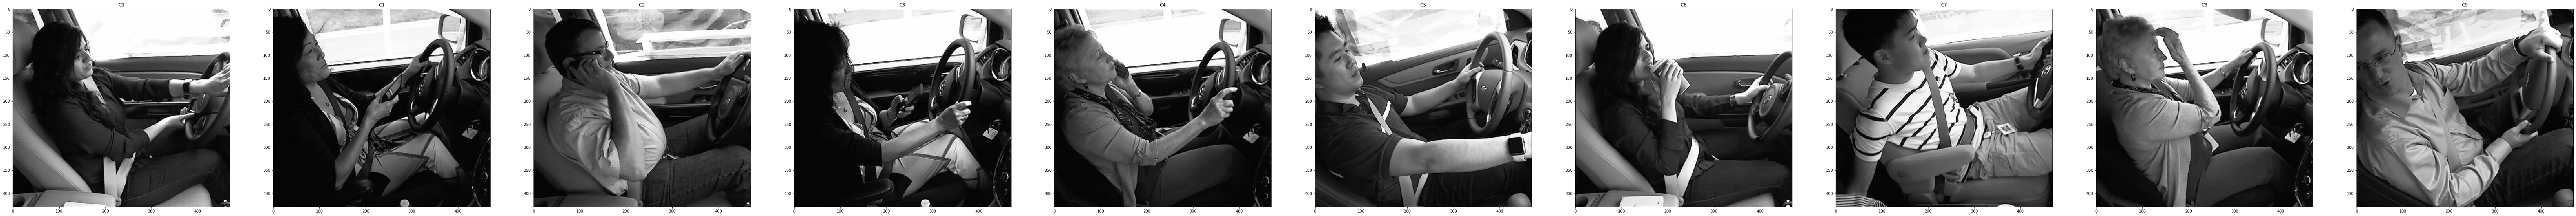

In [2]:
f, ax = plt.subplots(1,10, figsize = (120,120))
for i in range(10):
  #print('now we are in the folder C',i)
    labels = imread("train/c"+str(i)+"/*.jpg")
    for j in range(1):
        img = labels[j]
        label = i
        ax[i].imshow(img)
        ax[i].set_title('C'+str(i))
        plt.show


# After Editing
f, ax = plt.subplots(1,10, figsize = (120,120))
for i in range(10):
  #print('now we are in the folder C',i)
    labels = imread("train/c"+str(i)+"/*.jpg")
    for j in range(1):
        img = labels[j]
        img = color.rgb2gray(img)
        img = img[50:,120:-50]
        label = i
        ax[i].imshow(img,cmap='gray')
        ax[i].set_title('C'+str(i))
        plt.show

In [3]:
train_image = []
image_label = []
row = 64        #height of the image 
col = 64        #width of the image 
a = row*col
DDEPTH = cv2.CV_16S
vector_newX = np.zeros((a, 1))

vector_newY = []


for i in range(10):
    print('now we are in the folder C',i)
    labels = imread("train/c"+str(i)+"/*.jpg")
    for j in range(1000):#len(labels)):
  #for j in range(500):
        img = labels[j]
        img = color.rgb2gray(img)
        img = img[50:,120:-50]
        img = cv2.resize(img,(row,col))
        img = cv2.GaussianBlur(img, (3, 3), 2)
        gradx = cv2.Sobel(img, DDEPTH , 1, 0, ksize=3, scale=1, delta=0)
        gradx = cv2.convertScaleAbs(gradx)
        
        grady = cv2.Sobel(img, DDEPTH , 0, 1, ksize=3, scale=1, delta=0)
        grady = cv2.convertScaleAbs(grady)
        
        grad = cv2.addWeighted(gradx, 0.5, grady, 0.5, 0)
        #print(np.shape(grad))
        flat = grad.reshape(a,1)
        vector_newX = np.c_[vector_newX,flat]
        Y = int(i)
        #print(Y)
        vector_newY = np.append(vector_newY,Y)
        #print(vector_newY)
        label = i
        train_image.append([img,label])
        image_label.append(i)
        

       

now we are in the folder C 0
now we are in the folder C 1
now we are in the folder C 2
now we are in the folder C 3
now we are in the folder C 4
now we are in the folder C 5
now we are in the folder C 6
now we are in the folder C 7
now we are in the folder C 8
now we are in the folder C 9


In [4]:
print(vector_newY.shape)

(10000,)


In [4]:
vector_newX = vector_newX.T
print(vector_newY.shape)
finalX_train = vector_newX[1:,:]
print(finalX_train.shape)
combined_train = np.c_[finalX_train,vector_newY]
print('size of feature martix is:',np.shape(combined_train))

(10000,)
(10000, 4096)
size of feature martix is: (10000, 4097)


In [5]:

X = finalX_train#combined_train[0:,:-1]  #iloc is a --> Purely integer-location based indexing for selection by position from data.
Y = vector_newY#combined_train[0:,-1]
X = X.astype('float')
#Y = Y.astype('float')
X = X/255
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 50)

In [6]:
print(Y_test.shape)
print(Y_train.shape)

(3000,)
(7000,)


In [7]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

model = keras.Sequential([keras.layers.Flatten(),
                          keras.layers.Dense(1000, activation=tf.nn.relu),
                          keras.layers.Dropout(0.1),
                          keras.layers.Dense(128, activation=tf.nn.relu),
                          keras.layers.Dropout(0.2),
                          keras.layers.Dense(64, activation=tf.nn.softmax)])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])



Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [8]:
history = model.fit(X_train,Y_train,epochs=5, validation_data = (X_test,Y_test))
model.summary()

Train on 7000 samples, validate on 3000 samples
Epoch 1/5
7000/7000 [==============================] - 5s 777us/sample - loss: 2.4673 - acc: 0.1497 - val_loss: 1.9827 - val_acc: 0.3787
Epoch 2/5
7000/7000 [==============================] - 3s 417us/sample - loss: 1.6071 - acc: 0.4587 - val_loss: 1.2058 - val_acc: 0.7033
Epoch 3/5
7000/7000 [==============================] - 3s 418us/sample - loss: 0.9143 - acc: 0.7399 - val_loss: 0.7049 - val_acc: 0.8183
Epoch 4/5
7000/7000 [==============================] - 3s 413us/sample - loss: 0.4957 - acc: 0.8801 - val_loss: 0.4319 - val_acc: 0.8927
Epoch 5/5
7000/7000 [==============================] - 3s 414us/sample - loss: 0.2949 - acc: 0.9324 - val_loss: 0.3263 - val_acc: 0.9167
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________

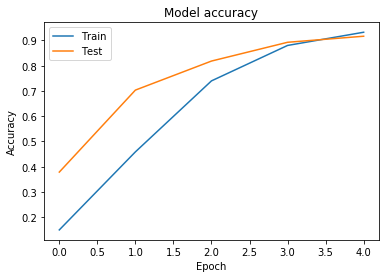

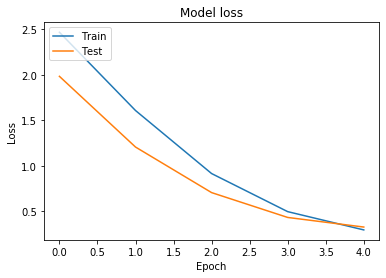

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [11]:
print(X_train.shape)

(8000, 10000)


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
clf = RandomForestClassifier(n_estimators=100,criterion="gini")

# Train Random Forest Classifer
clf = clf.fit(X_train,Y_train)

#Predict the response for test dataset
Y_pred = clf.predict(X_test)

Accuracy = metrics.accuracy_score(Y_test, Y_pred)
print("Split Accuracy:",(Accuracy*100))


Split Accuracy: 95.55


In [10]:
%matplotlib notebook
from sklearn import  metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from matplotlib.legend_handler import HandlerLine2D
from sklearn.metrics import roc_curve, auc
#Create Random Forest classifer object
max_depths = np.linspace(1, 32, 32, endpoint=True)
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
min_samples_splits = np.linspace(0.1, 0.1, 1, endpoint=True)
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
i = 1

clf = RandomForestClassifier(n_estimators=600, n_jobs=-1,criterion="gini",max_depth=32,min_impurity_split= 0.01)
# Train Random Forest Classifer
clf = clf.fit(X_train,Y_train)
i = i+1
y_pred_RF = clf.predict(X_test)
print("Classification report for - \n{}:\n{}\n".format(
clf, metrics.classification_report(Y_test, y_pred_RF)))
cm = confusion_matrix(Y_test, y_pred_RF)
#cm = np.array(confusion_matrix(y_test, y_pred))
print(cm)

Classification report for - 
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=32, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=0.01,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False):
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93       296
         1.0       0.95      0.99      0.97       291
         2.0       0.93      0.98      0.95       296
         3.0       0.97      0.96      0.96       318
         4.0       0.95      0.97      0.96       294
         5.0       0.96      0.96      0.96       283
         6.0       0.95      0.98      0.96     

In [11]:
%matplotlib notebook
from sklearn import svm, metrics, datasets
from sklearn.utils import Bunch
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
max_depths = np.linspace(1, 32, 32, endpoint=True)

# Create Decision Tree classifer object
m = DecisionTreeClassifier(random_state= 0,min_impurity_split= 0.01)
# Train Decision Tree Classifer
m = m.fit(X_train,Y_train)
#Predict the response for test dataset
y_pred_DT = m.predict(X_test)
print("Classification report for - \n{}:\n{}\n".format(
m, metrics.classification_report(Y_test, y_pred_DT)))
print("Classification report for - \n{}:\n{}\n".format(
m, metrics.classification_report(Y_test, y_pred_DT)))
cm = confusion_matrix(Y_test, y_pred_DT)
#cm = np.array(confusion_matrix(y_test, y_pred))
print(cm)

Classification report for - 
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=0.01,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best'):
              precision    recall  f1-score   support

         0.0       0.72      0.68      0.70       296
         1.0       0.73      0.74      0.73       291
         2.0       0.68      0.73      0.70       296
         3.0       0.78      0.77      0.78       318
         4.0       0.67      0.72      0.69       294
         5.0       0.75      0.72      0.74       283
         6.0       0.69      0.71      0.70       304
         7.0       0.70      0.73      0.72       292
         8.0       0.67      0.65      0.66       295
     

In [14]:
%matplotlib notebook
from sklearn import svm, metrics, datasets
from sklearn.utils import Bunch
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC


#svc = svm.SVC()
clf = OneVsRestClassifier(LinearSVC())
clf.fit(X_train, Y_train)
#for kernel in ('linear', 'poly', 'rbf'):
print ("Training model ")
#clf = svm.SVC(kernel='poly', gamma=2)
#clf.fit(X_train,Y_train)
y_pred_SVM = clf.predict(X_test)
print("Classification report for - \n{}:\n{}\n".format(
clf, metrics.classification_report(Y_test, y_pred_SVM)))
from sklearn.metrics import classification_report, confusion_matrix

cm_SVM = confusion_matrix(Y_test, y_pred_SVM)
#cm = np.array(confusion_matrix(y_test, y_pred))
print(cm_SVM)
cm_SVM = np.asarray(cm_SVM)
print(sum(cm_SVM))


Training model 
Classification report for - 
OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                        fit_intercept=True, intercept_scaling=1,
                                        loss='squared_hinge', max_iter=1000,
                                        multi_class='ovr', penalty='l2',
                                        random_state=None, tol=0.0001,
                                        verbose=0),
                    n_jobs=None):
              precision    recall  f1-score   support

         0.0       0.73      0.64      0.68       296
         1.0       0.69      0.80      0.74       291
         2.0       0.71      0.57      0.63       296
         3.0       0.79      0.77      0.78       318
         4.0       0.68      0.77      0.72       294
         5.0       0.72      0.86      0.79       283
         6.0       0.69      0.75      0.72       304
         7.0       0.58      0.84      0.69       292
   

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
gnb = GaussianNB()
y_pred = gnb.fit(X_train, Y_train).predict(X_test)

print("Classification report for - \n{}:\n{}\n".format(
gnb, metrics.classification_report(Y_test, y_pred)))
cm_SVM = confusion_matrix(Y_test, y_pred)
#cm = np.array(confusion_matrix(y_test, y_pred))
print(cm_SVM)

Classification report for - 
GaussianNB(priors=None, var_smoothing=1e-09):
              precision    recall  f1-score   support

         0.0       0.57      0.39      0.46       296
         1.0       0.64      0.62      0.63       291
         2.0       0.70      0.58      0.64       296
         3.0       0.31      0.88      0.46       318
         4.0       0.59      0.44      0.50       294
         5.0       0.77      0.71      0.74       283
         6.0       0.62      0.76      0.68       304
         7.0       0.86      0.58      0.69       292
         8.0       0.72      0.44      0.54       295
         9.0       0.68      0.27      0.39       331

    accuracy                           0.57      3000
   macro avg       0.65      0.57      0.57      3000
weighted avg       0.64      0.57      0.57      3000


[[114   8   7 137   8   4   5   3   7   3]
 [  4 181  10  63   6   1  17   6   0   3]
 [  2  15 173  75   4   1  12   5   9   0]
 [ 14   2   2 280   3   9   1   0   

In [26]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
clf = AdaBoostClassifier(n_estimators=600)
#scores = cross_val_score(clf, X_train, Y_train, cv=5)

y_pred = clf.fit(X_train, Y_train).predict(X_test)

print("Classification report for - \n{}:\n{}\n".format(
clf, metrics.classification_report(Y_test, y_pred)))
cm_ab = confusion_matrix(Y_test, y_pred)
#cm = np.array(confusion_matrix(y_test, y_pred))
print(cm_ab)

Classification report for - 
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=600, random_state=None):
              precision    recall  f1-score   support

         0.0       0.47      0.42      0.44       296
         1.0       0.40      0.41      0.40       291
         2.0       0.40      0.47      0.43       296
         3.0       0.51      0.37      0.43       318
         4.0       0.39      0.28      0.33       294
         5.0       0.41      0.61      0.49       283
         6.0       0.50      0.47      0.48       304
         7.0       0.46      0.60      0.52       292
         8.0       0.35      0.41      0.38       295
         9.0       0.45      0.31      0.37       331

    accuracy                           0.43      3000
   macro avg       0.43      0.43      0.43      3000
weighted avg       0.44      0.43      0.43      3000


[[123  38  12  26  14  15  13   8  15  32]
 [ 18 118  47   2  10   3  27  

In [20]:
X_train_pca.shape

(8000, 2300)

In [38]:
from sklearn.decomposition import PCA
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
#The amount of variance that each PC explains
n_components = 3000
pca = PCA(n_components=n_components, whiten=False).fit(X_train)
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

print(var1)
plt.plot(var1)

[ 6.95 12.53 15.88 ... 97.82 97.82 97.82]


<IPython.core.display.Javascript object>


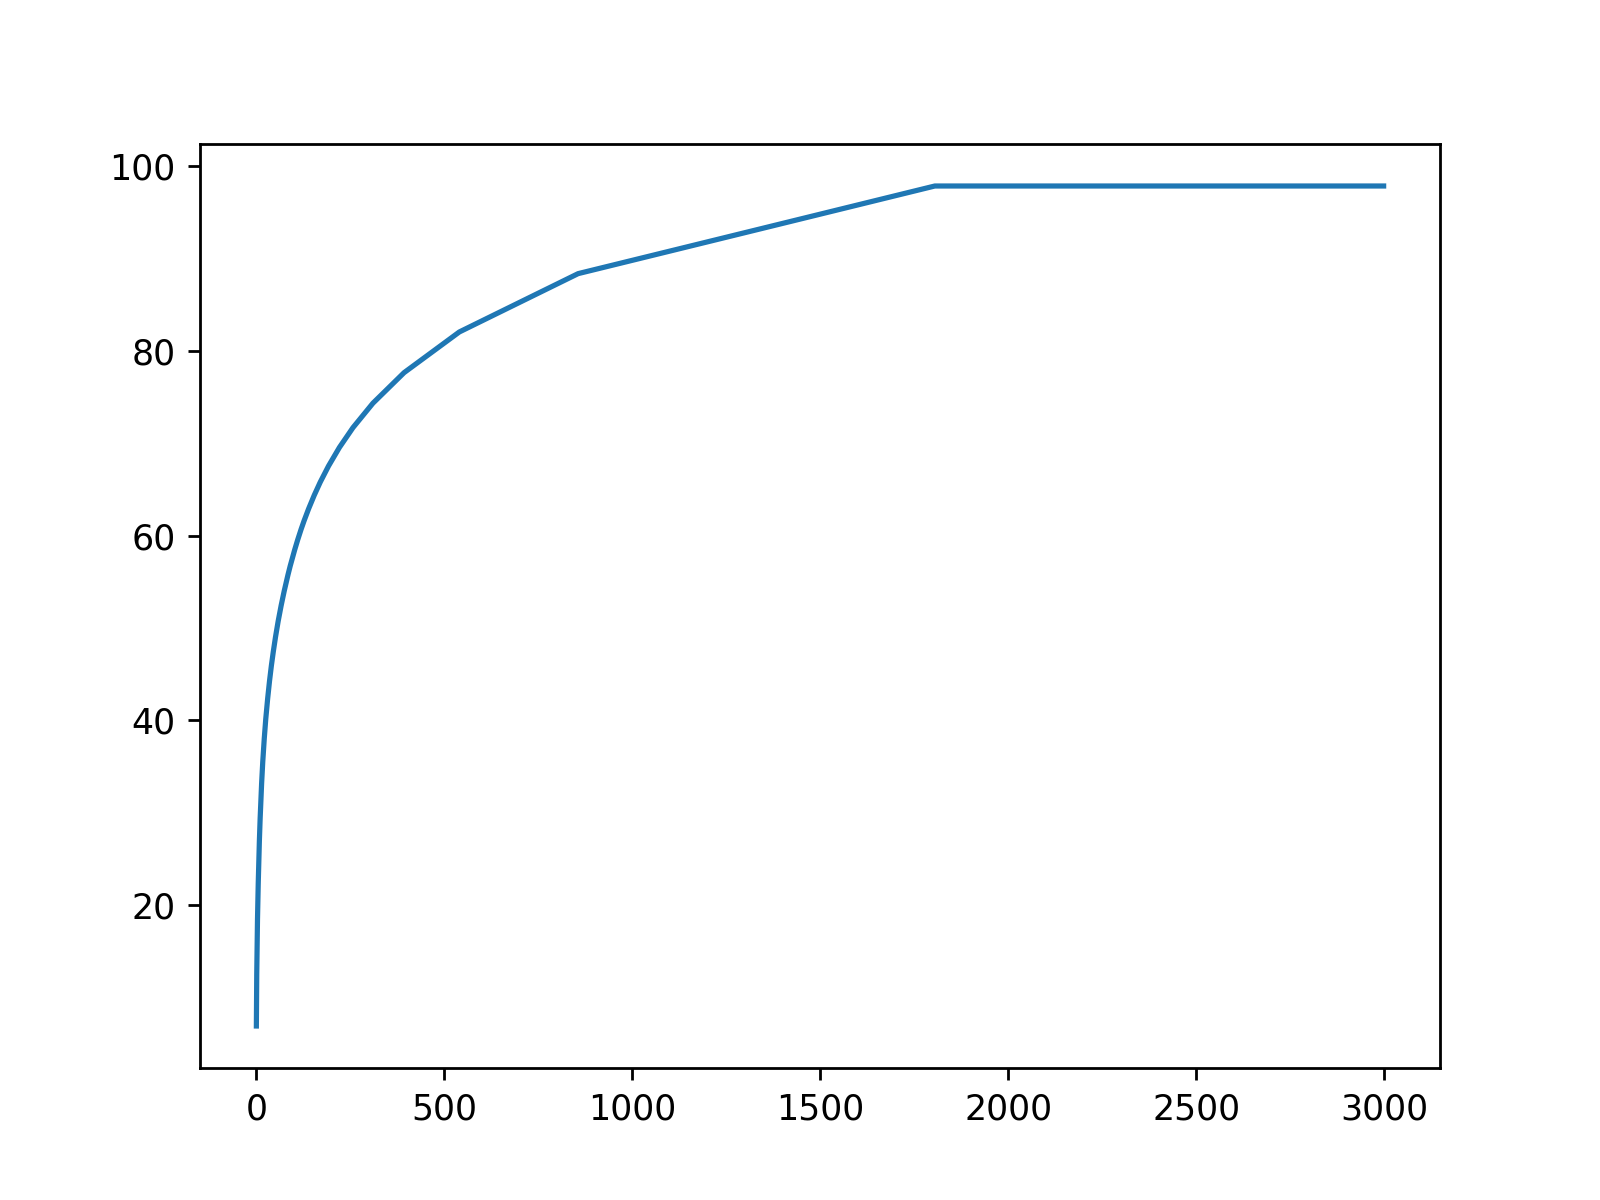

In [39]:
plt.plot(var1)

In [40]:
# Compute a PCA 
from sklearn.decomposition import PCA
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
n_components = 2000
pca = PCA(n_components=n_components, whiten=True).fit(X_train)
# apply PCA transformation
X_train_pca = pca.transform(X_train)

X_train_pca.shape

clf_red = OneVsRestClassifier(LinearSVC())
clf_red.fit(X_train_pca, Y_train)
#for kernel in ('linear', 'poly', 'rbf'):
print ("Training model ")

pca1 = PCA(n_components=2000, whiten=True).fit(X_test)
X_test_pca = pca1.transform(X_test)
X_test_pca.shape
y_pred_SVM_red = clf_red.predict(X_test_pca)
print("Classification report for - \n{}:\n{}\n".format(
clf_red, metrics.classification_report(Y_test, y_pred_SVM_red)))
from sklearn.metrics import classification_report, confusion_matrix

cm_SVM_red = confusion_matrix(Y_test, y_pred_SVM_red)
#cm = np.array(confusion_matrix(y_test, y_pred))
print(cm_SVM_red)


Training model 
Classification report for - 
OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                        fit_intercept=True, intercept_scaling=1,
                                        loss='squared_hinge', max_iter=1000,
                                        multi_class='ovr', penalty='l2',
                                        random_state=None, tol=0.0001,
                                        verbose=0),
                    n_jobs=None):
              precision    recall  f1-score   support

         0.0       0.17      0.18      0.18       296
         1.0       0.08      0.08      0.08       291
         2.0       0.10      0.10      0.10       296
         3.0       0.17      0.15      0.16       318
         4.0       0.14      0.13      0.13       294
         5.0       0.09      0.10      0.09       283
         6.0       0.10      0.10      0.10       304
         7.0       0.18      0.20      0.19       292
   

In [30]:
# Compute a PCA 
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
n_components = 2000
pca = PCA(n_components=n_components, whiten=True).fit(X_train)
# apply PCA transformation
X_train_pca = pca.transform(X_train)

X_train_pca.shape

clf_red_dt = DecisionTreeClassifier(random_state= 0,min_impurity_split= 0.01)
clf_red_dt.fit(X_train_pca, Y_train)
#for kernel in ('linear', 'poly', 'rbf'):
print ("Training model ")

pca1 = PCA(n_components=2000, whiten=True).fit(X_test)
X_test_pca = pca1.transform(X_test)
X_test_pca.shape
y_pred_dt_red = clf_red_dt.predict(X_test_pca)

print("Classification report for - \n{}:\n{}\n".format(
clf_red_dt, metrics.classification_report(Y_test, y_pred_dt_red)))
from sklearn.metrics import classification_report, confusion_matrix

cm_dt_red = confusion_matrix(Y_test, y_pred_dt_red)
#cm = np.array(confusion_matrix(y_test, y_pred))
print(cm_dt_red)

Training model 
Classification report for - 
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=0.01,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best'):
              precision    recall  f1-score   support

         0.0       0.15      0.20      0.17       296
         1.0       0.08      0.08      0.08       291
         2.0       0.11      0.11      0.11       296
         3.0       0.25      0.20      0.22       318
         4.0       0.16      0.17      0.17       294
         5.0       0.11      0.10      0.10       283
         6.0       0.11      0.10      0.10       304
         7.0       0.17      0.17      0.17       292
         8.0       0.14      0.17      0.15

In [31]:
# Compute a PCA 
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix

n_components = 2000
pca = PCA(n_components=n_components, whiten=True).fit(X_train)
# apply PCA transformation
X_train_pca = pca.transform(X_train)

X_train_pca.shape

clf = RandomForestClassifier(n_estimators=600, n_jobs=-1,criterion="gini",max_depth=32,min_impurity_split= 0.01)
# Train Random Forest Classifer
clf = clf.fit(X_train_pca,Y_train)


pca1 = PCA(n_components=2000, whiten=True).fit(X_test)
X_test_pca = pca1.transform(X_test)
X_test_pca.shape
y_pred_dt_red = clf_red_dt.predict(X_test_pca)

y_pred_RF = clf.predict(X_test_pca)
print("Classification report for - \n{}:\n{}\n".format(
clf, metrics.classification_report(Y_test, y_pred_RF)))
cm = confusion_matrix(Y_test, y_pred_RF)
#cm = np.array(confusion_matrix(y_test, y_pred))
print(cm)


Classification report for - 
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=32, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=0.01,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False):
              precision    recall  f1-score   support

         0.0       0.18      0.22      0.20       296
         1.0       0.13      0.13      0.13       291
         2.0       0.18      0.16      0.17       296
         3.0       0.23      0.15      0.18       318
         4.0       0.26      0.29      0.28       294
         5.0       0.08      0.08      0.08       283
         6.0       0.12      0.11      0.12     

In [32]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
clf = AdaBoostClassifier(n_estimators=600)

n_components = 2000
pca = PCA(n_components=n_components, whiten=True).fit(X_train)
# apply PCA transformation
X_train_pca = pca.transform(X_train)
X_train_pca.shape


X_test_pca.shape
pca1 = PCA(n_components=2000, whiten=True).fit(X_test)
X_test_pca = pca1.transform(X_test)

y_pred = clf.fit(X_train_pca, Y_train).predict(X_test_pca)


print("Classification report for - \n{}:\n{}\n".format(
clf, metrics.classification_report(Y_test, y_pred_dt_red)))
cm = confusion_matrix(Y_test, y_pred)
#cm = np.array(confusion_matrix(y_test, y_pred))
print(cm)


Classification report for - 
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=600, random_state=None):
              precision    recall  f1-score   support

         0.0       0.15      0.19      0.17       296
         1.0       0.09      0.08      0.08       291
         2.0       0.11      0.11      0.11       296
         3.0       0.25      0.20      0.22       318
         4.0       0.16      0.17      0.17       294
         5.0       0.11      0.10      0.11       283
         6.0       0.10      0.10      0.10       304
         7.0       0.17      0.17      0.17       292
         8.0       0.13      0.16      0.14       295
         9.0       0.15      0.14      0.14       331

    accuracy                           0.14      3000
   macro avg       0.14      0.14      0.14      3000
weighted avg       0.14      0.14      0.14      3000


[[63 24 18 24  8 64 26  7 49 13]
 [49 59 45  0  4 29 43  9 45  8]
 [23 50 

In [56]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
gnb = GaussianNB()
n_components = 2000
pca = PCA(n_components=n_components, whiten=True).fit(X_train)
# apply PCA transformation
X_train_pca = pca.transform(X_train)
print(X_train_pca.shape)

print(X_test_pca.shape)
pca1 = PCA(n_components=2000, whiten=True).fit(X_test)
X_test_pca = pca1.transform(X_test)

y_pred = gnb.fit(X_train_pca, Y_train).predict(X_test_pca)
print(y_pred.shape)
print(Y_test.shape)
print("Classification report for - \n{}:\n{}\n".format(
gnb, metrics.classification_report(Y_test, y_pred)))
cm_gn = confusion_matrix(Y_test, y_pred)
#cm = np.array(confusion_matrix(y_test, y_pred))
print(cm_gn)

(7000, 2000)
(3000, 2000)
(3000,)
(3000,)
Classification report for - 
GaussianNB(priors=None, var_smoothing=1e-09):
              precision    recall  f1-score   support

         0.0       0.17      0.06      0.09       296
         1.0       0.14      0.06      0.08       291
         2.0       0.17      0.34      0.22       296
         3.0       0.22      0.27      0.24       318
         4.0       0.21      0.13      0.16       294
         5.0       0.08      0.06      0.07       283
         6.0       0.18      0.10      0.12       304
         7.0       0.24      0.21      0.22       292
         8.0       0.18      0.43      0.26       295
         9.0       0.16      0.13      0.14       331

    accuracy                           0.18      3000
   macro avg       0.17      0.18      0.16      3000
weighted avg       0.17      0.18      0.16      3000


[[ 19  12  73  32  18  27  20  14  50  31]
 [ 22  17  61  46  11  25  14  29  46  20]
 [ 10   7 100  62  16  16  10  36  35

In [42]:
# Create a function
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
lda = LinearDiscriminantAnalysis(n_components=None)
X_lda = lda.fit(X_train, Y_train)

lda_var_ratios = lda.explained_variance_ratio_
def select_n_components(var_ratio, goal_var: float) -> int:
    # Set initial variance explained so far
    total_variance = 0.0
    
    # Set initial number of features
    n_components = 0
    
    # For the explained variance of each feature:
    for explained_variance in var_ratio:
        
        # Add the explained variance to the total
        total_variance += explained_variance
        
        # Add one to the number of components
        n_components += 1
        
        # If we reach our goal level of explained variance
        if total_variance >= goal_var:
            # End the loop
            break
            
    # Return the number of components
    return n_components
select_n_components(lda_var_ratios, 0.95)

9

In [44]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
gnb = GaussianNB()
lda = LinearDiscriminantAnalysis(n_components=9).fit(X_train,Y_train)
X_train_lda = lda.transform(X_train)
X_train_lda.shape

(7000, 9)

In [65]:
lda_test = LinearDiscriminantAnalysis(n_components=9).fit(X_test,Y_test)
X_test_lda = lda_test.transform(X_train)
print(X_test_lda.shape)
print(Y_train.shape)

(7000, 9)
(7000,)


In [63]:
y_pred = gnb.fit(X_train, Y_train).predict(X_test)
print(y_pred.shape)
print(Y_test.shape)
print("Classification report for - \n{}:\n{}\n".format(
gnb, metrics.classification_report(Y_test, y_pred)))
cm_gn = confusion_matrix(Y_test, y_pred)
#cm = np.array(confusion_matrix(y_test, y_pred))
print(cm_gn)

(3000,)
(3000,)
Classification report for - 
GaussianNB(priors=None, var_smoothing=1e-09):
              precision    recall  f1-score   support

         0.0       0.57      0.39      0.46       296
         1.0       0.64      0.62      0.63       291
         2.0       0.70      0.58      0.64       296
         3.0       0.31      0.88      0.46       318
         4.0       0.59      0.44      0.50       294
         5.0       0.77      0.71      0.74       283
         6.0       0.62      0.76      0.68       304
         7.0       0.86      0.58      0.69       292
         8.0       0.72      0.44      0.54       295
         9.0       0.68      0.27      0.39       331

    accuracy                           0.57      3000
   macro avg       0.65      0.57      0.57      3000
weighted avg       0.64      0.57      0.57      3000


[[114   8   7 137   8   4   5   3   7   3]
 [  4 181  10  63   6   1  17   6   0   3]
 [  2  15 173  75   4   1  12   5   9   0]
 [ 14   2   2 280   

In [52]:
y_pred.shape

(7000,)

In [50]:
X_test.shape

(3000, 4096)

In [51]:
Y_test.shape

(3000,)